### 자전거 거치대 수 대비 대여수 비율

In [1]:
import pandas as pd
import numpy as np

In [3]:
cnt = pd.read_csv("data/자전거대여수_all.csv", encoding='utf-8')
display(cnt.head())
cnt.info() # 총 2083개의 데이터

,대여소번호,대여소명,동,구,총거치대수,2020년_대여수,2019년_대여수
0,1695,월계미륭아파트 정문,월계3동,노원구,10,0,0
1,2301,현대고등학교 건너편,신사동,강남구,10,11352,17117
2,2302,교보타워 버스정류장(신논현역 3번출구 후면),논현1동,강남구,10,4762,12548
3,2303,논현역 7번출구,논현1동,강남구,15,2367,8413
4,2304,신영 ROYAL PALACE 앞,논현2동,강남구,10,931,2631


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소번호      2083 non-null   int64 
 1   대여소명       2083 non-null   object
 2   동          2083 non-null   object
 3   구          2083 non-null   object
 4   총거치대수      2083 non-null   int64 
 5   2020년_대여수  2083 non-null   int64 
 6   2019년_대여수  2083 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 114.0+ KB


In [4]:
cnt1 = cnt.drop(cnt.columns[[0, 1, 3]], axis=1)
cnt1.head()

,동,총거치대수,2020년_대여수,2019년_대여수
0,월계3동,10,0,0
1,신사동,10,11352,17117
2,논현1동,10,4762,12548
3,논현1동,15,2367,8413
4,논현2동,10,931,2631


In [5]:
cnt1['총대여수'] = cnt1[['2020년_대여수', '2019년_대여수']].sum(axis=1)
cnt1 = cnt1.drop(cnt1.columns[[2, 3]], axis=1)
cnt1.fillna(0, inplace=True)
display(cnt1.head())

,동,총거치대수,총대여수
0,월계3동,10,0
1,신사동,10,28469
2,논현1동,10,17310
3,논현1동,15,10780
4,논현2동,10,3562


In [6]:
cnt2 = cnt1.groupby(cnt1['동']).sum()
display(cnt2.sort_values(by=['총대여수'], ascending=False).head(5)) # 총대여수 내림차순 정렬

,총거치대수,총대여수
동,,
여의동,608,621964
가양1동,948,470514
자양3동,147,268024
상암동,419,245503
당산2동,147,239109


In [7]:
cnt2['비율'] = round(cnt2['총대여수'] / cnt2['총거치대수'] * 100, 2)
print('[총 거치대수 대비 총 대여수가 낮은 비율 10개]')
display(cnt2.sort_values(by=['비율']).head(10))
print('[총 거치대수 대비 총 대여수가 높은 비율 10개]')
display(cnt2.sort_values(by=['비율']).tail(10))

[총 거치대수 대비 총 대여수가 낮은 비율 10개]


,총거치대수,총대여수,비율
동,,,
이태원2동,10,0,0.00
청림동,15,0,0.00
창신1동,40,104,260.00
방학2동,20,140,700.00
후암동,10,72,720.00
신사2동,10,82,820.00
독산2동,14,138,985.71
중곡2동,9,94,1044.44
중화1동,8,105,1312.50


[총 거치대수 대비 총 대여수가 높은 비율 10개]


,총거치대수,총대여수,비율
동,,,
신림동,65,131003,201543.08
등촌3동,59,121151,205340.68
우장산동,42,89819,213854.76
자양1동,44,101249,230111.36
풍납1동,15,35171,234473.33
자양2동,24,58477,243654.17
노량진2동,10,26130,261300.00
송파1동,37,98197,265397.30
숭인1동,10,28201,282010.00


In [8]:
cnt3 = cnt2.reset_index()

In [9]:
#dong = cnt3['동']

In [10]:
# dong.to_excel('data/dong_list.xlsx', index=False)

### 생산인구, 경사도, 자전거도로 길이 data와 자전거대여수 data merge

In [12]:
df = pd.read_csv("data/df_HDong.csv", encoding='utf-8')
df.info() # 총 423개의 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  423 non-null    int64  
 1   HDong_name  423 non-null    object 
 2   workppl     423 non-null    float64
 3   dem         423 non-null    float64
 4   bikelength  423 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.6+ KB


In [13]:
display(df.head(5))

,Unnamed: 0,HDong_name,workppl,dem,bikelength
0,1,가락1동,22381.0,-15.5247,7150.0
1,2,가락2동,18686.0,-39.3115,4704.0
2,3,가락본동,25532.0,-30.7845,6932.0
3,4,가리봉동,7566.0,-21.8088,0.0
4,5,가산동,25926.0,-12.9490,2108.0


In [14]:
df = df.drop(df.columns[[0]], axis=1)

In [15]:
display(df.head())

,HDong_name,workppl,dem,bikelength
0,가락1동,22381.0,-15.5247,7150.0
1,가락2동,18686.0,-39.3115,4704.0
2,가락본동,25532.0,-30.7845,6932.0
3,가리봉동,7566.0,-21.8088,0.0
4,가산동,25926.0,-12.9490,2108.0


In [16]:
df.columns=['동', '생산인구', '경사도', '자전거도로길이']

In [17]:
display(df.head())

,동,생산인구,경사도,자전거도로길이
0,가락1동,22381.0,-15.5247,7150.0
1,가락2동,18686.0,-39.3115,4704.0
2,가락본동,25532.0,-30.7845,6932.0
3,가리봉동,7566.0,-21.8088,0.0
4,가산동,25926.0,-12.9490,2108.0


In [18]:
display(cnt3.head())

,동,총거치대수,총대여수,비율
0,가락1동,115,74652,64914.78
1,가락2동,45,33583,74628.89
2,가락본동,55,25487,46340.00
3,가리봉동,10,5621,56210.00
4,가산동,258,160033,62028.29


In [19]:
all = pd.merge(df, cnt3, on='동', how='outer')
display(all.head())

,동,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
0,가락1동,22381.0,-15.5247,7150.0,115.0,74652.0,64914.78
1,가락2동,18686.0,-39.3115,4704.0,45.0,33583.0,74628.89
2,가락본동,25532.0,-30.7845,6932.0,55.0,25487.0,46340.00
3,가리봉동,7566.0,-21.8088,0.0,10.0,5621.0,56210.00
4,가산동,25926.0,-12.9490,2108.0,258.0,160033.0,62028.29


In [20]:
all[all['동'].isnull()] # 동이 null인 것은 없음
all[all['생산인구'].isnull()] # 성희가 조사한 동-내가 정리한 동 Null값 없음
all[all['총거치대수'].isnull()] # 동이름 있는데 거치대 수가 없는 즉, 자전거대여소가 없는 동

,동,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
19,거여2동,10255.0,-47.0949,0.0,NaN,NaN,NaN
46,길음2동,11108.0,-32.1931,686.0,NaN,NaN,NaN
53,남현동,11469.0,-128.3537,4023.0,NaN,NaN,NaN
66,대림1동,11664.0,-17.9474,1935.0,NaN,NaN,NaN
90,둔촌1동,2702.0,-31.4826,0.0,NaN,NaN,NaN
126,반포3동,17822.0,-10.9822,1362.0,NaN,NaN,NaN
159,사당4동,14471.0,-28.3723,0.0,NaN,NaN,NaN
180,상도3동,21312.0,-54.3228,0.0,NaN,NaN,NaN
207,성현동,16202.0,-93.6938,0.0,NaN,NaN,NaN
227,시흥5동,8507.0,-111.3490,0.0,NaN,NaN,NaN


#### 19. 거여2동 --> 거여1동에 위치 *
#### 46. 길음2동 --> 길음1동, 월곡1동 위치 *
#### 53. 남현동 --> 관악산이 위치한 역
#### 66. 대림1동 --> 대림2동 위치 *
#### 90. 둔촌1동 --> 바로 옆 올림픽공원 주변으로 대여소 위치
#### 126. 반포3동 --> 잠원동 위치 *
#### 159. 사당4동 --> 사당3동 위치 *
#### 180. 상도3동 --> 대방동 위치 *
#### 207. 성현동 --> 은천동 위치 *
#### 227. 시흥5동 --> 시흥1동 위치 *
#### 230. 신길4동 --> 신길3동 위치 * 
#### 246. 신원동 --> 서림동 위치 *
#### 282. 염리동 --> 아현동, 대흥동 위치 *
#### 295. 용문동 --> 효창동 위치 *
#### 340. 장위2동 --> 월곡동 위치 *
#### 375. 창신2동 --> 종로5.6가동 위치 *
#### 404. 홍제1동 --> 홍제2동 위치 *
#### 408. 화곡2동 --> 화곡 8동 위치 *

#### 56. 노량진2동 --> 변경
#### 162. 삼각산동 --> 변경
#### 167. 삼양동 --> 변경
#### 170. 상계10동 --> 변경
#### 176. 상계8동 --> 변경
#### 221. 숭인1동 --> 변경
#### 231. 신길5동 --> 변경
#### 252. 신월6동 --> 변경
#### 265. 아현동 --> 변경
#### 283. 염창동 --> 변경

In [21]:
all.fillna(0, inplace=True) # 결측값 0으로 치환

In [22]:
all.to_csv('data/dong_df_1110.csv', index=False, encoding='utf-8')

In [23]:
display(all.head(10))

,동,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
0,가락1동,22381.0,-15.5247,7150.0,115.0,74652.0,64914.78
1,가락2동,18686.0,-39.3115,4704.0,45.0,33583.0,74628.89
2,가락본동,25532.0,-30.7845,6932.0,55.0,25487.0,46340.00
3,가리봉동,7566.0,-21.8088,0.0,10.0,5621.0,56210.00
4,가산동,25926.0,-12.9490,2108.0,258.0,160033.0,62028.29
5,가양1동,29687.0,-8.2590,19044.0,948.0,470514.0,49632.28
6,가양2동,6812.0,-6.3928,5339.0,65.0,62588.0,96289.23
7,가양3동,4354.0,-10.0878,776.0,33.0,48481.0,146912.12
8,가회동,1729.0,-59.9773,0.0,33.0,19088.0,57842.42
9,갈현1동,24001.0,-65.7546,0.0,15.0,11612.0,77413.33


### 데이터 표준화

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [25]:
data = all.set_index('동')
display(data.head())

,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
동,,,,,,
가락1동,22381.0,-15.5247,7150.0,115.0,74652.0,64914.78
가락2동,18686.0,-39.3115,4704.0,45.0,33583.0,74628.89
가락본동,25532.0,-30.7845,6932.0,55.0,25487.0,46340.00
가리봉동,7566.0,-21.8088,0.0,10.0,5621.0,56210.00
가산동,25926.0,-12.9490,2108.0,258.0,160033.0,62028.29


In [26]:
zscore = (data - data.mean(axis=0)) / data.std(axis=0)
display(zscore.head())

,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
동,,,,,,
가락1동,0.805473,0.674284,1.051002,0.689735,0.527125,-0.156425
가락2동,0.286642,0.071430,0.436598,-0.258851,-0.221716,0.029002
가락본동,1.247918,0.287539,0.996243,-0.123339,-0.369337,-0.510988
가리봉동,-1.274766,0.515020,-0.744987,-0.733144,-0.731568,-0.322585
가산동,1.303241,0.739563,-0.215484,2.627560,2.083939,-0.211523


In [27]:
# check of 'mean=0'
zscore.mean(axis=0)

생산인구      -9.711171e-17
경사도       -7.123931e-16
자전거도로길이   -3.628566e-17
총거치대수      8.503836e-17
총대여수      -5.908722e-17
비율         8.635068e-16
dtype: float64

In [28]:
# check of 'standard deviation=1'
zscore.std(axis=0)

생산인구       1.0
경사도        1.0
자전거도로길이    1.0
총거치대수      1.0
총대여수       1.0
비율         1.0
dtype: float64

In [29]:
x_min = zscore.min()
x_max = zscore.max()
x_len = len(zscore)

print(x_min)
print(x_max)
print(x_len)

생산인구      -2.296280
경사도       -6.100637
자전거도로길이   -0.744987
총거치대수     -0.868656
총대여수      -0.834060
비율        -1.395546
dtype: float64
생산인구        3.302742
경사도         0.905724
자전거도로길이     7.957146
총거치대수      11.977904
총대여수       10.506665
비율          5.530881
dtype: float64
423


In [40]:
from matplotlib import font_manager, rc
font_path = "data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
print (plt.rcParams['font.family'] )
matplotlib.font_manager._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

['Malgun Gothic']


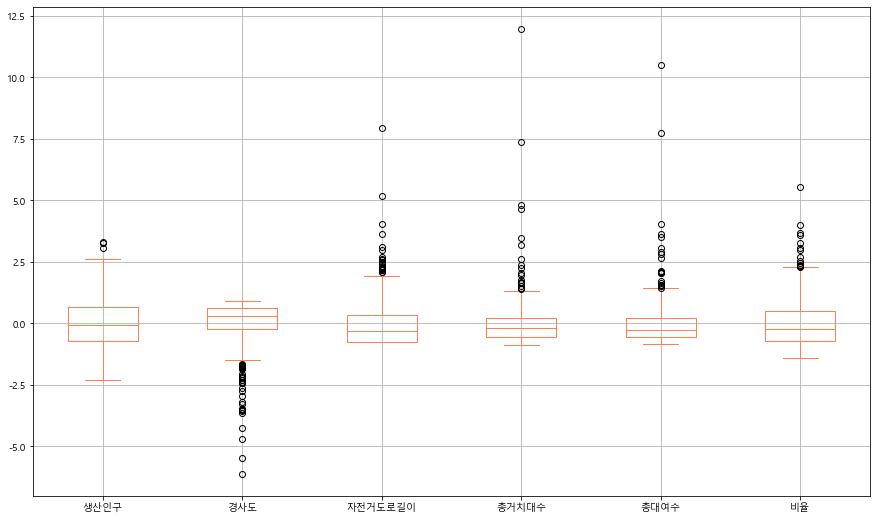

In [39]:
# Box Plot
zscore[['생산인구', '경사도','자전거도로길이', '총거치대수', '총대여수', '비율']].plot(kind='box', figsize=(15, 9), color='coral')
plt.grid()


# .........................................정규분포표 
# x = np.linspace(x_min, x_max, x_len)
# plt.plot(x, zscore['생산인구'], alpha=0.7, label='생산인구')
# plt.plot(x, zscore['경사도'], alpha=0.7, label='생산인구')
# plt.plot(x, zscore['자전거도로길이'], alpha=0.7, label='생산인구')
# plt.plot(x, zscore['총거치대수'], alpha=0.7, label='생산인구')
# plt.plot(x, zscore['총대여수'], alpha=0.7, label='생산인구')
# plt.plot(x, zscore['비율'], alpha=0.7, label='생산인구')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc='upper left')

plt.show()